# Task 4.9 Part 2 Visualisations

In [2]:
### Step 1

In [3]:
#import thelibraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# loading the new prepared data frames

In [5]:
path = r'c:\Users\graha\Desktop\Career foundry\Chapter 4\Instacart Basket Analysis 09.02.2024'

In [6]:
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))

In [7]:
blue_palette = ['#3f83d1', '#1a5aad', '#004080', '#6fa8dc', '#8db6cd', '#add8e6', '#002366', '#195190', '#4d85b8', '#99c2eb']

In [8]:
df_final.head()

,order_id,user_id,order_number,order_day,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,Gender,State,Age,date_joined,dependants,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


In [9]:
df_final.dtypes

order_id                               int64
user_id                                int64
order_number                           int64
order_day                              int64
order_hour_of_day                      int64
days_since_prior_order               float64
product_id                             int64
add_to_cart_order                      int64
reordered                              int64
product_name                          object
aisle_id                               int64
department_id                          int64
prices                               float64
price_range_loc                       object
busiest_day                           object
order_day_rank                        object
Busiest_day                           object
busiest_days                          object
Busiest_days                          object
busiest_period_of_day                 object
max_order                              int64
loyalty_flag                          object
mean_produ

### Step 2 Bar chart, Histogram, Line chart

### Subsetting

In [10]:
# creeating a list with random numbers
np.random.seed(4)
split = np.random.rand(len(df_final)) <= 0.7

### Creating Dataframes

In [11]:
#creating samples of large and small

In [12]:
#store 70% of the random numbers
large = df_final[split]

In [13]:
# store 30% of the random numbers
small = df_final[~split]

In [14]:
#Checking the reults

In [15]:
len(df_final)

32404859

In [16]:
len(large)

22683761

In [17]:
len(small)

9721098

In [18]:
len(large) + len(small)

32404859

In [19]:
# add the two random samples together we get the same result as the complete set

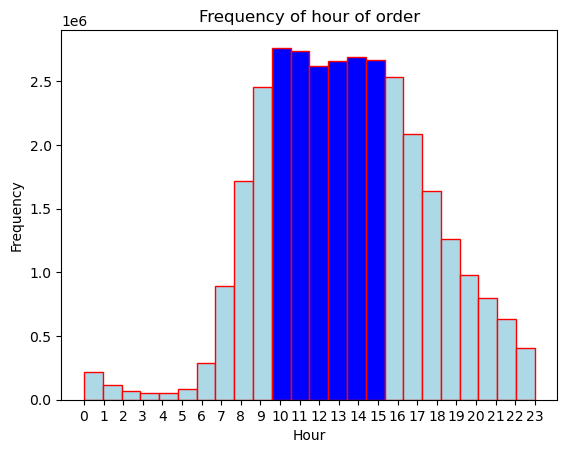

In [20]:
n,bins,patches=plt.hist(df_final['order_hour_of_day'], bins=24 ,color='lightblue', edgecolor='red')
plt.title('Frequency of hour of order')
plt.ylabel('Frequency')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24,1))
patches[10].set_fc('blue')
patches[11].set_fc('blue')
patches[12].set_fc('blue')
patches[13].set_fc('blue')
patches[14].set_fc('blue')
patches[15].set_fc('blue')
# Save chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

In [21]:
# between 10: and 15:00 we see our peak order times

### Bar Chart

In [22]:
df_loyalty=df_final.groupby('loyalty_flag')['order_id'].nunique()

In [23]:
df_loyalty=pd.DataFrame(df_loyalty).reset_index()

In [24]:
df_loyalty

,loyalty_flag,order_id
0,Loyal customer,1024517
1,New customer,637048
2,Regular customer,1553120


In [25]:
df_loyalty.columns

Index(['loyalty_flag', 'order_id'], dtype='object')

In [26]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())  # Format as integer
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())  # Format as integer
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)


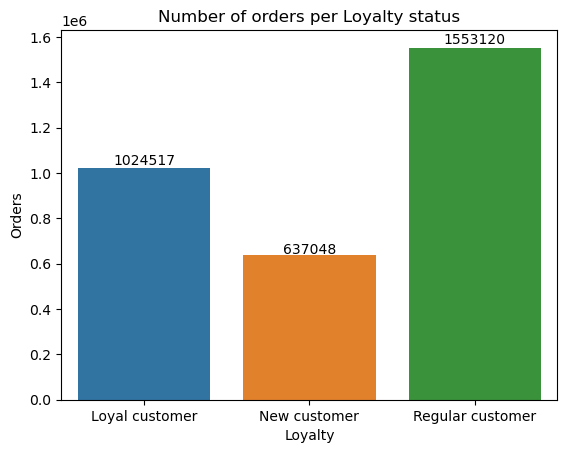

In [27]:
blue_palette = ['#3f83d1', '#1a5aad', '#004080', '#6fa8dc', '#8db6cd', '#add8e6', '#002366', '#195190', '#4d85b8', '#99c2eb']
fig=sns.barplot(data=df_loyalty,x='loyalty_flag',y='order_id',errwidth=0)
fig.set(xlabel='Loyalty',ylabel='Orders',title="Number of orders per Loyalty status")
show_values(fig)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_per_loyalty.png'))

In [28]:
# here we can see that the orders placed are by "regular customers" followde by "loyalcustomers" and finally by "new customers"

# Scatterplot

In [29]:
#grouping the columns
df_final2 = df_final.groupby('user_id').agg({'Age':['mean'],'income':['mean']})

In [30]:
df_final2

,Age,income
,mean,mean
user_id,,
1,31.0,40423.0
2,68.0,64940.0
3,33.0,93240.0
4,31.0,45435.0
5,75.0,115242.0
...,...,...
206205,38.0,99402.0
206206,25.0,75041.0


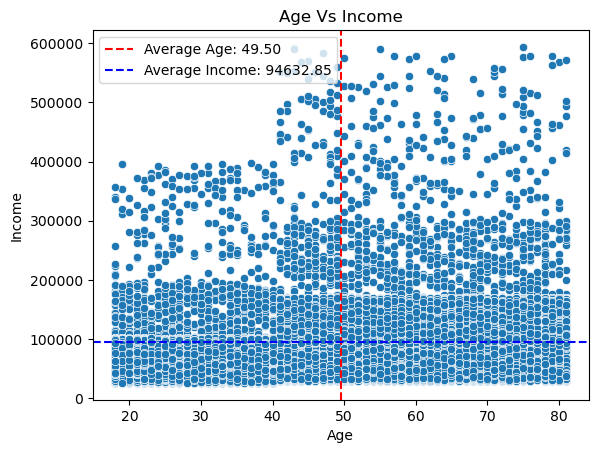

In [31]:
# Calculate average values
avg_age = df_final2[('Age', 'mean')].mean()
avg_income = df_final2[('income', 'mean')].mean()

# Create scatter plot
fig = sns.scatterplot(x=('Age', 'mean'), y=('income', 'mean'), data=df_final2)

# Add average lines
plt.axvline(x=avg_age, color='red', linestyle='--', label=f'Average Age: {avg_age:.2f}')
plt.axhline(y=avg_income, color='blue', linestyle='--', label=f'Average Income: {avg_income:.2f}')

# Set labels and title
fig.set(xlabel='Age', ylabel='Income', title="Age Vs Income")

# Add legend
plt.legend()

# Save plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_income.png'))

# Show plot
plt.show()

while the data is scattered over the entire graph and there is no clear indication from the massive amount of data of any trend,
we can see that the average age is 49.5 years old and the average income is $94632.85 per anum

### Line Chart

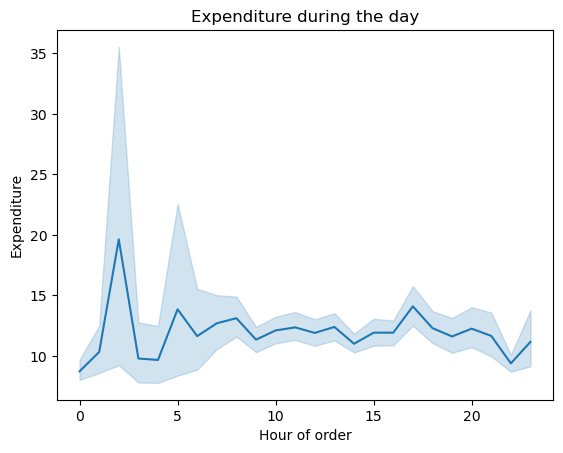

In [32]:
line=sns.lineplot(data=small,x='order_hour_of_day',y='prices')
line.set(xlabel='Hour of order',ylabel='Expenditure',title="Expenditure during the day")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_hours.png'))

In [33]:
df_expenditure=df_final.groupby('order_hour_of_day')['prices'].sum()

In [34]:
df_expenditure=pd.DataFrame(df_expenditure).reset_index()

In [35]:
df_expenditure

,order_hour_of_day,prices
0,0,2281125.1
1,1,1156287.5
2,2,1019750.3
3,3,680130.1
4,4,651364.0
5,5,1111937.9
6,6,3421974.7
7,7,10961331.9
8,8,21437476.7
9,9,28830061.7


In [36]:
df_expenditure = df_expenditure.sort_values(by=('prices'), ascending=True)

In [37]:
df_expenditure.sort_values(('prices'),ascending=False)

,order_hour_of_day,prices
11,11,33268554.8
10,10,32868237.5
15,15,32400773.8
16,16,31793097.5
14,14,31569115.4
12,12,31280439.7
13,13,30541285.8
9,9,28830061.7
17,17,26736786.6
8,8,21437476.7


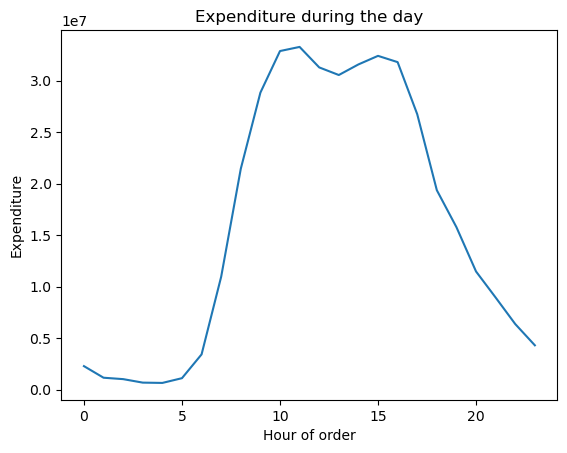

In [38]:
line=sns.lineplot(data=df_expenditure,x='order_hour_of_day',y='prices')
line.set(xlabel='Hour of order',ylabel='Expenditure',title="Expenditure during the day")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_hours.png'))

# Additinal graphs

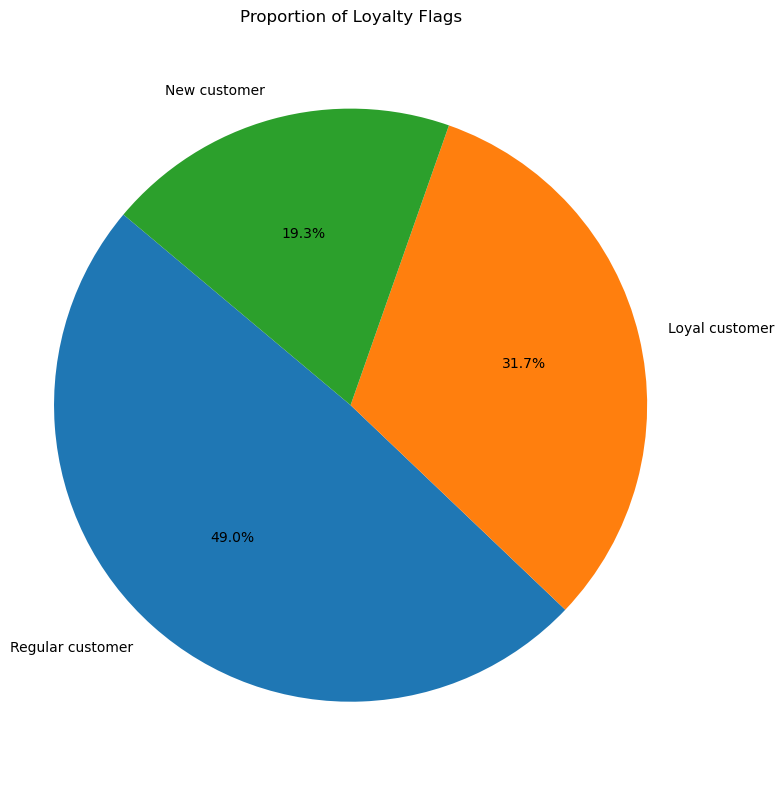

In [39]:
blue_palette = ['#3f83d1', '#1a5aad', '#004080', '#6fa8dc', '#8db6cd', '#add8e6', '#002366', '#195190', '#4d85b8', '#99c2eb']
# Pie Chart of Loyalty Flags
plt.figure(figsize=(8, 8))
loyalty_counts = df_final['loyalty_flag'].value_counts()
plt.pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Loyalty Flags')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()

# Save the plot as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_loyalty_flags.png'))

# Display the plot
plt.show()

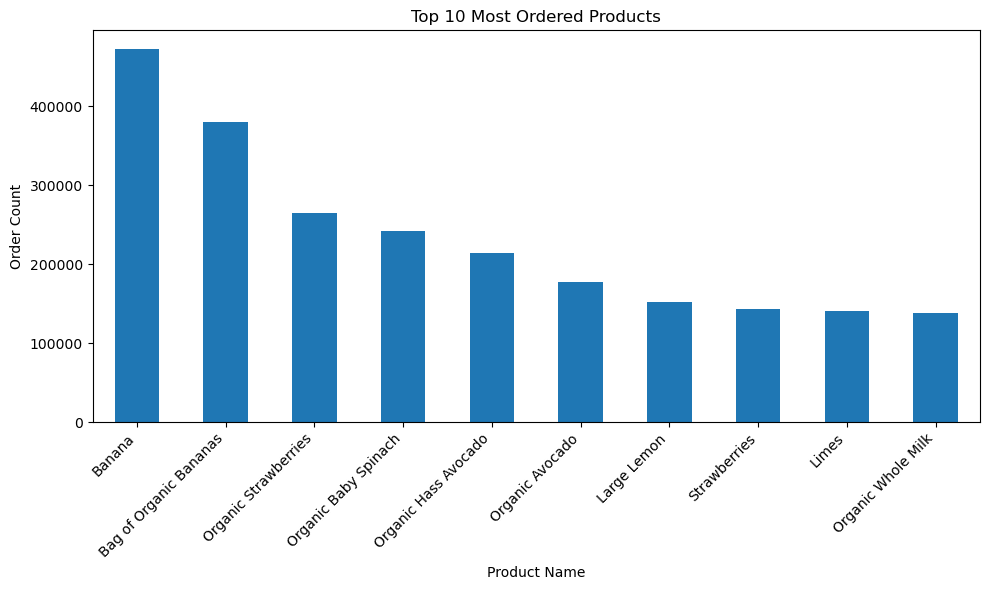

In [40]:
blue_palette = ['#3f83d1', '#1a5aad', '#004080', '#6fa8dc', '#8db6cd', '#add8e6', '#002366', '#195190', '#4d85b8', '#99c2eb']
# Get the top N most ordered products
top_products = df_final['product_name'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_10_most_ordered_products.png'))

# Display the plot
plt.show()

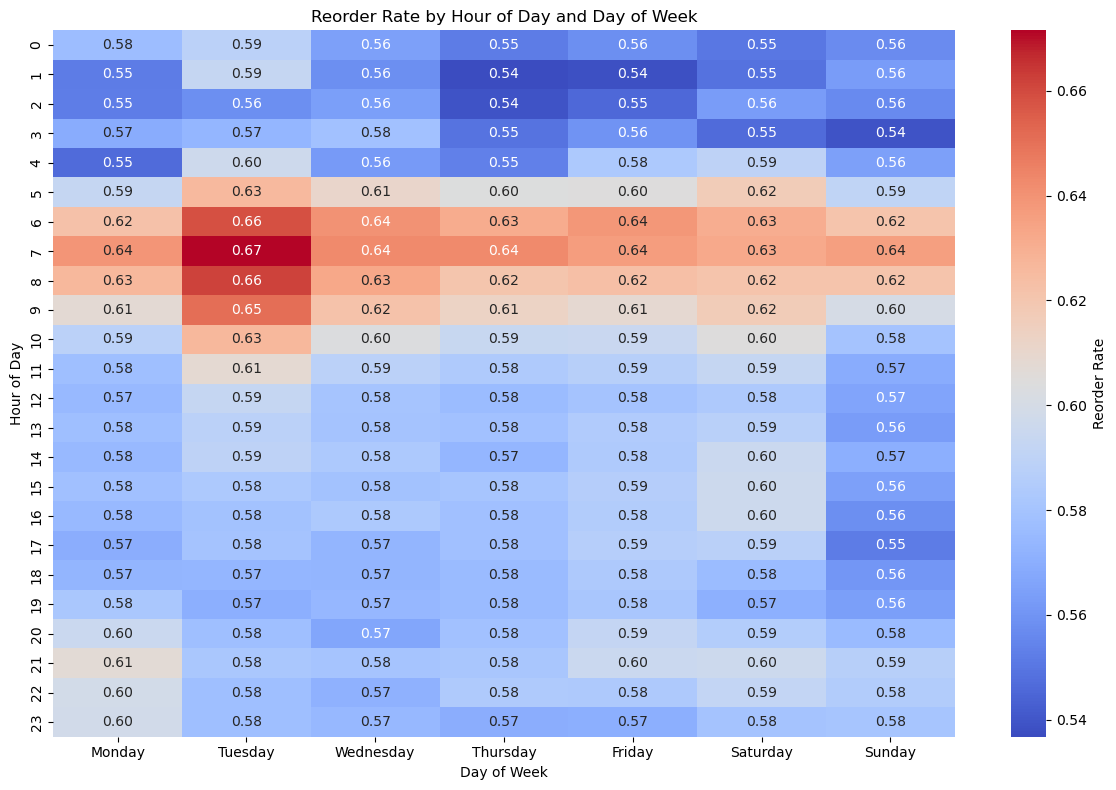

<Figure size 640x480 with 0 Axes>

In [41]:
# Create a pivot table to calculate reorder rate by hour of day and day of week
reorder_rate_pivot = df_final.pivot_table(index='order_hour_of_day', columns='order_day', values='reordered', aggfunc='mean')

# Set the order of the days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(reorder_rate_pivot, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Reorder Rate'}, xticklabels=day_order)
plt.title('Reorder Rate by Hour of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.tight_layout()

# Save the heatmap as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reorder_rate_by_hour_of_the_day_and_week.png'))

# Display the heatmap
plt.show()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 're order rate by hour of the day and week'))

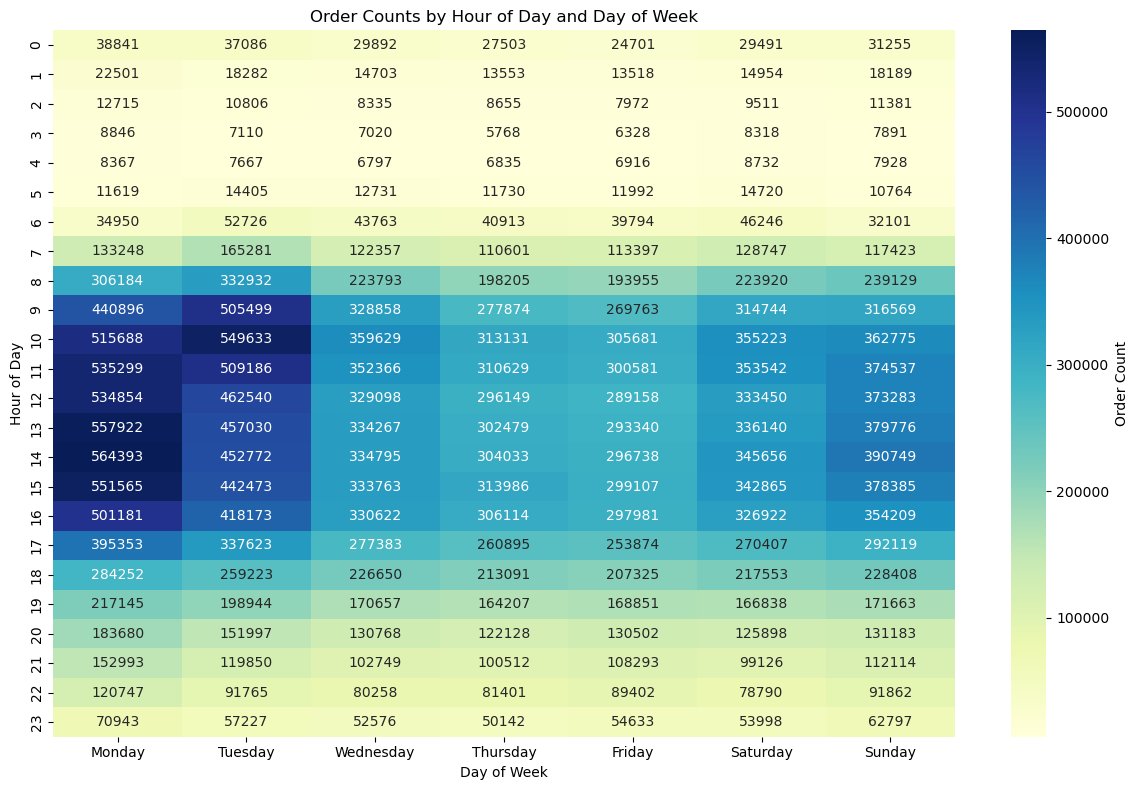

In [42]:
# Create a pivot table to calculate order counts by hour of day and day of week
order_counts_pivot = df_final.pivot_table(index='order_hour_of_day', columns='order_day', values='order_id', aggfunc='count')

# Set the order of the days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(order_counts_pivot, cmap='YlGnBu', annot=True, fmt="d", cbar_kws={'label': 'Order Count'}, xticklabels=day_order)
plt.title('Order Counts by Hour of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.tight_layout()

# Save the plot as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_counts_of_hours_of_day_and_day_of_week.png'))

# Display the plot
plt.show()#

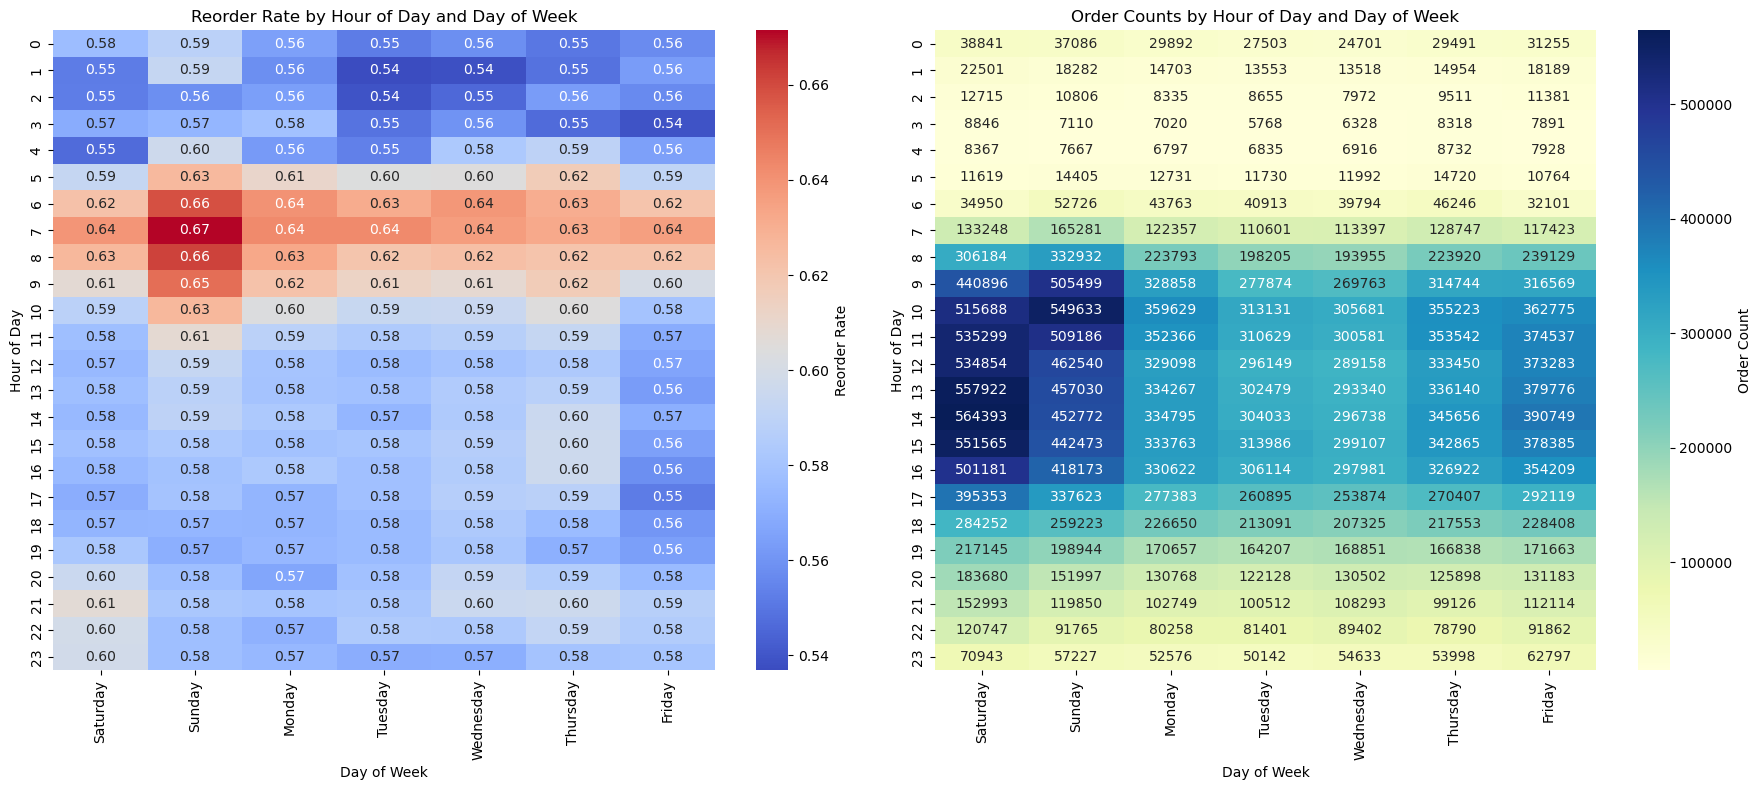

<Figure size 640x480 with 0 Axes>

In [43]:
# Create a pivot table to calculate reorder rate by hour of day and day of week
reorder_rate_pivot = df_final.pivot_table(index='order_hour_of_day', columns='order_day', values='reordered', aggfunc='mean')

# Create a pivot table to calculate order counts by hour of day and day of week
order_counts_pivot = df_final.pivot_table(index='order_hour_of_day', columns='order_day', values='order_id', aggfunc='count')

# Set the order of the days of the week
day_order = ["Saturday", "Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the heatmap for reorder rate
sns.heatmap(reorder_rate_pivot, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Reorder Rate'}, ax=axes[0], xticklabels=day_order)
axes[0].set_title('Reorder Rate by Hour of Day and Day of Week')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Hour of Day')

# Plot the heatmap for order counts
sns.heatmap(order_counts_pivot, cmap='YlGnBu', annot=True, fmt="d", cbar_kws={'label': 'Order Count'}, ax=axes[1], xticklabels=day_order)
axes[1].set_title('Order Counts by Hour of Day and Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Hour of Day')

# Adjust layout
plt.tight_layout()

# Save the subplots as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reorder_rate_and_order_counts_by_hour_of_day_and_week.png'))

# Display the subplots
plt.show()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order counts by hour of day and day of week'))

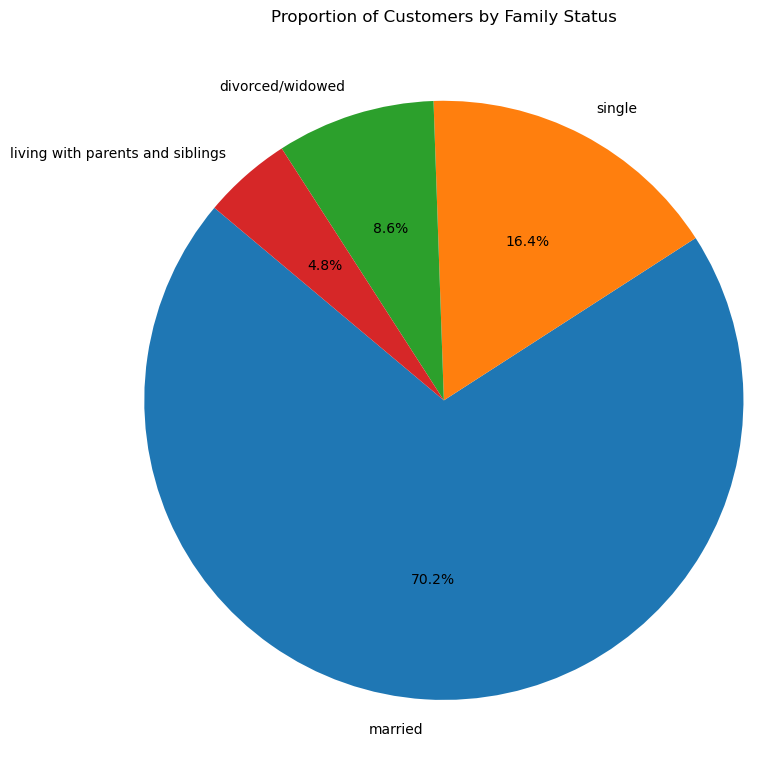

In [44]:
# Calculate the proportion of customers in each family status category
family_status_counts = df_final['family_status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(family_status_counts, labels=family_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customers by Family Status')
plt.axis('equal')  
plt.tight_layout()

# Save the plot as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_status.png'))

# Display the plot
plt.show()

In [45]:
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df-final2.pkl'))

NameError: name 'ords_prods_merge' is not defined